#  Gradient descent.

*   Élément de liste
*   Élément de liste



## Logistic regression
You can read more on logistic regression in wikipedia, but it's not necessary to complete the hw: https://en.wikipedia.org/wiki/Logistic_regression#Model

Let's generate a dataset for classification with two classes: red and green

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import sklearn
from sklearn import datasets
import numpy as np

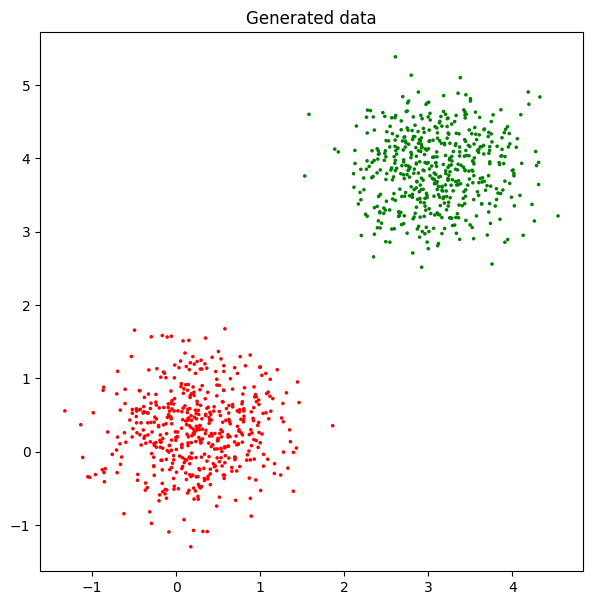

In [ ]:
n_samples = 1000
n_features = 2

X, Y = sklearn.datasets.make_blobs(
    n_samples=n_samples, centers=2, n_features=2, cluster_std=0.5, center_box=(-1, 5)
)

# for the bias term
X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

plt.figure(figsize=(7, 7))

y_colors = ["r" if y else "g" for y in Y]
plt.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10)

plt.title("Generated data")
plt.show()



## Implement a gradient descent using formulas


Model: $\hat{Y} = X\mathbf{w}$

$\hat{y_i} = x_i^T \mathbf{w}$

Sigmoid: $\sigma(z) = \frac{1}{1 + e^{-z}}$

Result: $p_i = P(y_i = 1 | x_i) = \sigma(\hat{y_i})$

Loss: $Q(y_i, \hat{y_i}) = -(y_i \cdot log (p_i) + (1 - y_i) \cdot log (1 - p_i)$

Gradient: $\nabla Q(\mathbf{w}) = ?$

Gradient decsent step: $\mathbf{w}^{step} = \mathbf{w}^{step - 1} - \gamma_{step} \nabla Q(\mathbf{w}^{step - 1})$


In [ ]:
import numpy as np

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def linear_model(X, w):
    return np.dot(X, w)

def loss(Y, Y_pred):
    return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

def gradient(X, Y, w):
    Y_pred = sigmoid(linear_model(X, w))
    return np.dot(X.T, Y_pred - Y) / len(Y)

def step(X, Y, w, learning_rate):
    grad = gradient(X, Y, w)
    return w - learning_rate * grad

def gradient_descent_alg(X, Y, w_0, learning_rate, num_steps):
    w_list = [w_0]
    w = w_0

    for _ in range(num_steps):
        w = step(X, Y, w, learning_rate)
        w_list.append(w)

    return w_list

In [ ]:
num_steps = 100
learning_rate = 1e-1

w_0 = np.random.uniform(-1, 1, n_features + 1)

w_list = np.array(gradient_descent_alg(X, Y, w_0, learning_rate, num_steps))

## Visualize the result

<ipython-input-9-8b16c5a9e211>:5: RuntimeWarning: invalid value encountered in log
  return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))


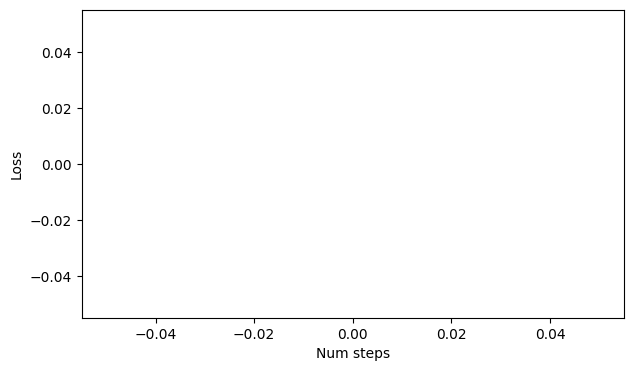

In [ ]:
plt.figure(figsize=(7, 4))

plt.plot(np.arange(0, num_steps + 1), [loss(Y, linear_model(X, w)) for w in w_list])
plt.xlabel('Num steps')
plt.ylabel('Loss')
plt.show()

In [ ]:
x_1 = np.arange(X[:, 0].min(), X[:, 0].max(), 0.05)
x_2 = np.arange(X[:, 1].min(), X[:, 1].max(), 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)


X_backgrond = np.concatenate([x_1.flatten()[:, None], x_2.flatten()[:, None],  np.ones((x_1.flatten().shape[0], 1))], axis=-1)
X_backgrond.shape


y_backgrond_logits = linear_model(X_backgrond, w_list[-1])
y_backgrond = np.round(sigmoid(y_backgrond_logits))
y_backgrond_colors = ["r" if y else "g" for y in y_backgrond]




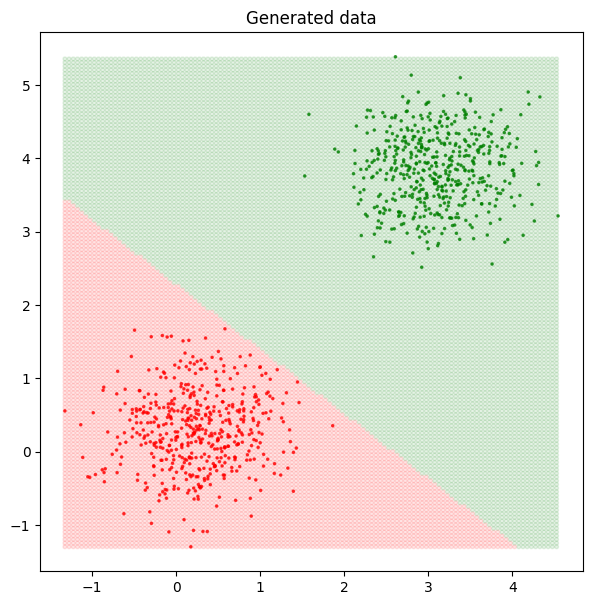

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X_backgrond[:, 0], X_backgrond[:, 1], c=y_backgrond_colors, marker=".", s=30, alpha=0.1)

y_colors = ["r" if y else "g" for y in Y]
plt.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10, alpha=0.7)

plt.title("Generated data")
plt.show()

In [ ]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')

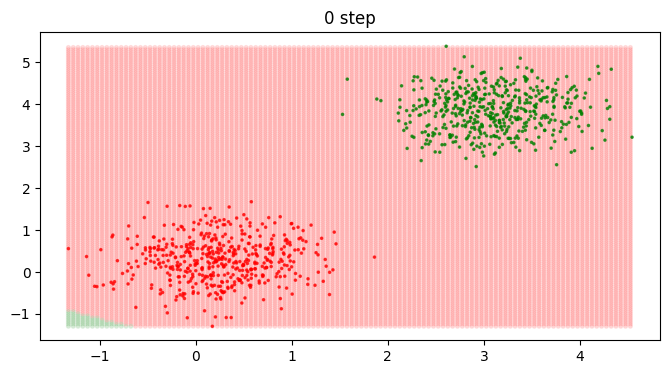

In [ ]:
fig = plt.figure(figsize=(4 * n_features, 4))

ax = fig.subplots(1, 1)

def animate(i):
  ax.clear()

  y_backgrond_logits = linear_model(X_backgrond, w_list[i])
  y_backgrond = np.round(sigmoid(y_backgrond_logits))
  y_backgrond_colors = ["r" if y else "g" for y in y_backgrond]

  ax.scatter(X_backgrond[:, 0], X_backgrond[:, 1], c=y_backgrond_colors, marker=".", s=30, alpha=0.1)

  y_colors = ["r" if y else "g" for y in Y]
  ax.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10, alpha=0.7)

  ax.set_title('%d step' % i)


animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)